In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Exploratory Data Analysis (EDA)

In [7]:
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
# List of categorical columns to factorize
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", 
                       "contact", "month", "day_of_week", "poutcome", "y"]

# Factorize the categorical columns
for col in categorical_columns:
    df[f"{col}_n"] = pd.factorize(df[col])[0]  # Corrected f-string usage

# List of numerical columns (both original and newly created)
num_variables = [f"{col}_n" for col in categorical_columns] + [
    "age", "duration", "campaign", "pdays", "previous", 
    "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"
]

# Scale the numerical features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[num_variables])

# Create DataFrame for scaled features
df_scal = pd.DataFrame(scaled_features, index=df.index, columns=num_variables)

# Display the first few rows of the scaled DataFrame
df_scal.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735


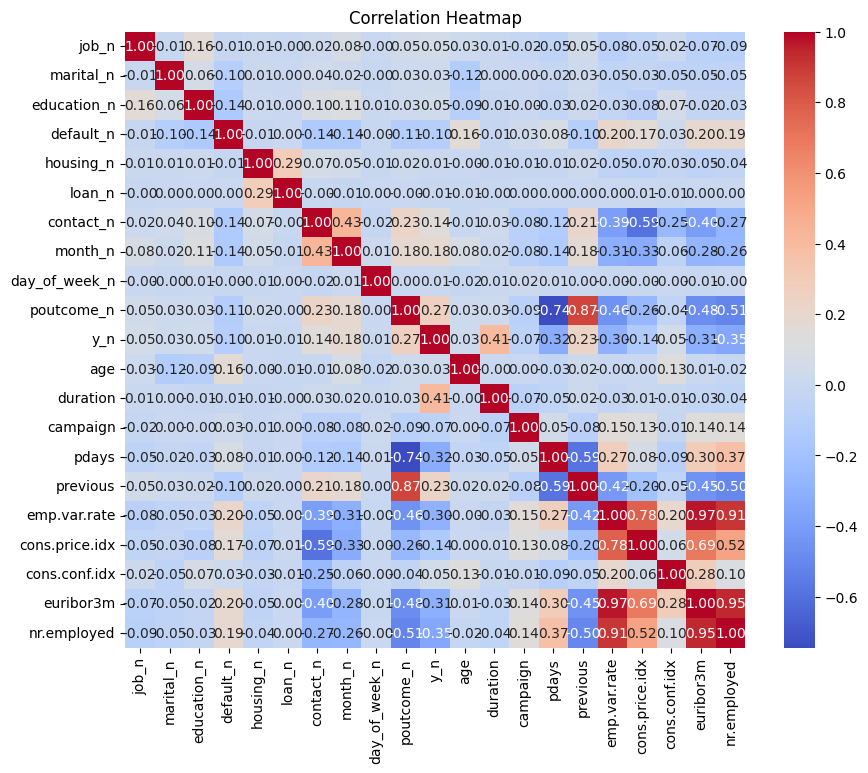

In [10]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_variables].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

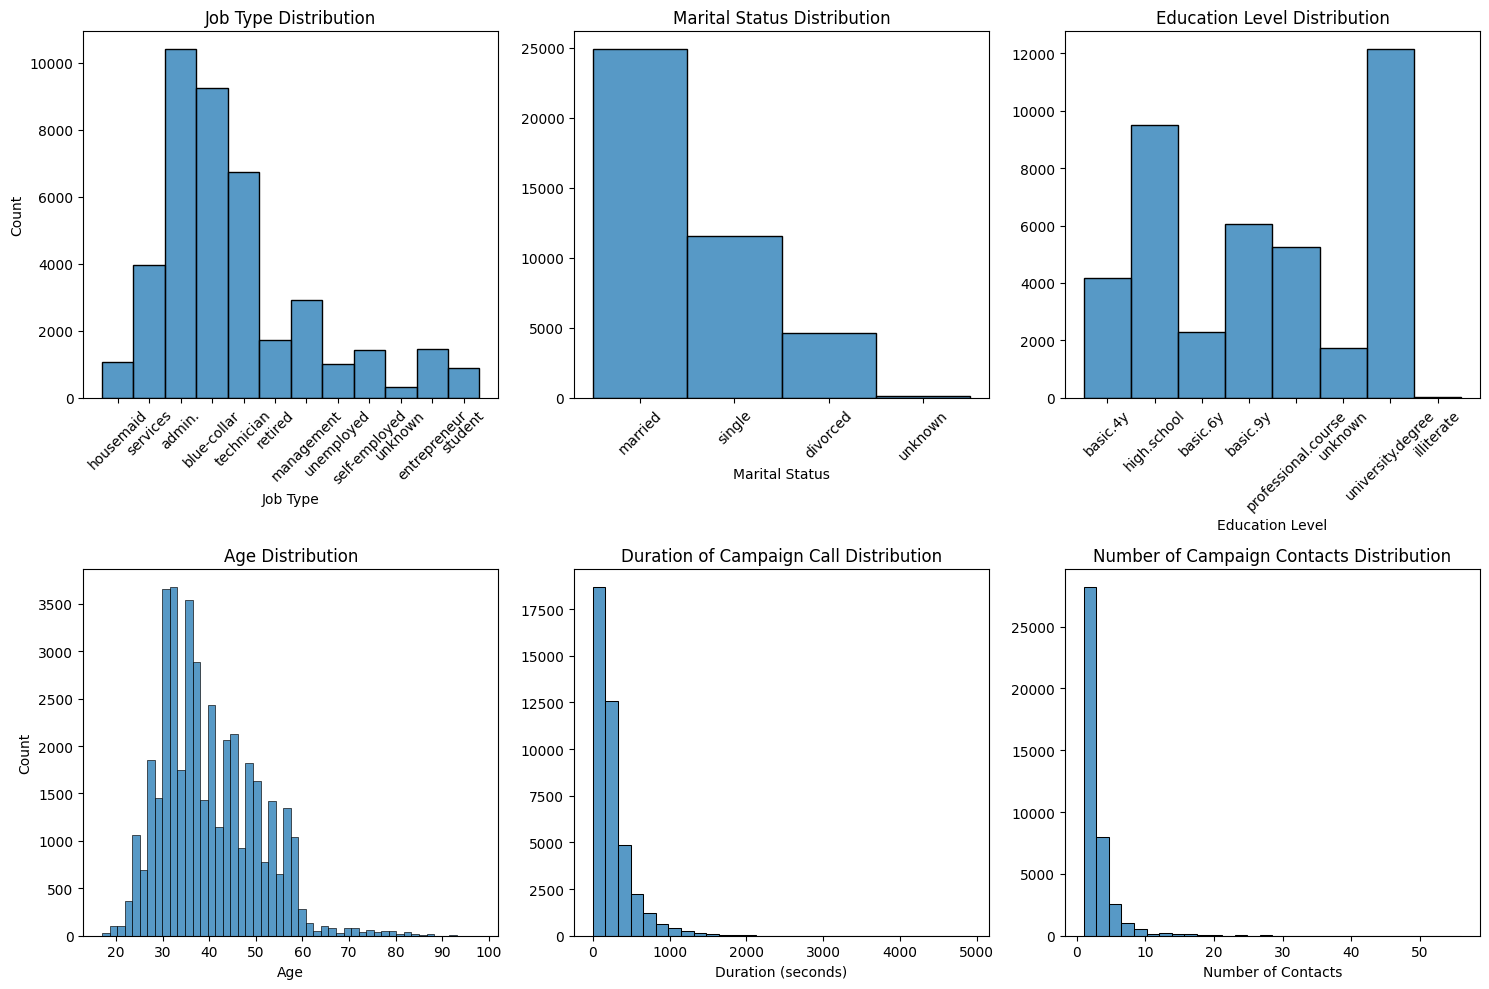

In [13]:
fig, axis = plt.subplots(2, 3, figsize=(15, 10))  # Increase figure size for better readability

# Job type histogram (categorical data with string labels)
sns.histplot(ax=axis[0, 0], data=df, x="job", discrete=True)
axis[0, 0].set_title("Job Type Distribution")
axis[0, 0].set_xlabel("Job Type")
axis[0, 0].set_ylabel("Count")
axis[0, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Marital status histogram (categorical data with string labels)
sns.histplot(ax=axis[0, 1], data=df, x="marital", discrete=True)
axis[0, 1].set_title("Marital Status Distribution")
axis[0, 1].set_xlabel("Marital Status")
axis[0, 1].set_ylabel(None)  # Remove y-label to reduce clutter
axis[0, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Education histogram (categorical data with string labels)
sns.histplot(ax=axis[0, 2], data=df, x="education", discrete=True)
axis[0, 2].set_title("Education Level Distribution")
axis[0, 2].set_xlabel("Education Level")
axis[0, 2].set_ylabel(None)  # Remove y-label to reduce clutter
axis[0, 2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Age histogram with optimized bin size
sns.histplot(ax=axis[1, 0], data=df, x="age", bins=50)
axis[1, 0].set_title("Age Distribution")
axis[1, 0].set_xlabel("Age")
axis[1, 0].set_ylabel("Count")

# Duration histogram with optimized bin size
sns.histplot(ax=axis[1, 1], data=df, x="duration", bins=30)
axis[1, 1].set_title("Duration of Campaign Call Distribution")
axis[1, 1].set_xlabel("Duration (seconds)")
axis[1, 1].set_ylabel(None)  # Remove y-label to reduce clutter

# Campaign histogram with optimized bin size
sns.histplot(ax=axis[1, 2], data=df, x="campaign", bins=30)
axis[1, 2].set_title("Number of Campaign Contacts Distribution")
axis[1, 2].set_xlabel("Number of Contacts")
axis[1, 2].set_ylabel(None)  # Remove y-label to reduce clutter

# Adjust the layout to reduce overlap and improve spacing
plt.tight_layout()

# Show the plot
plt.show()

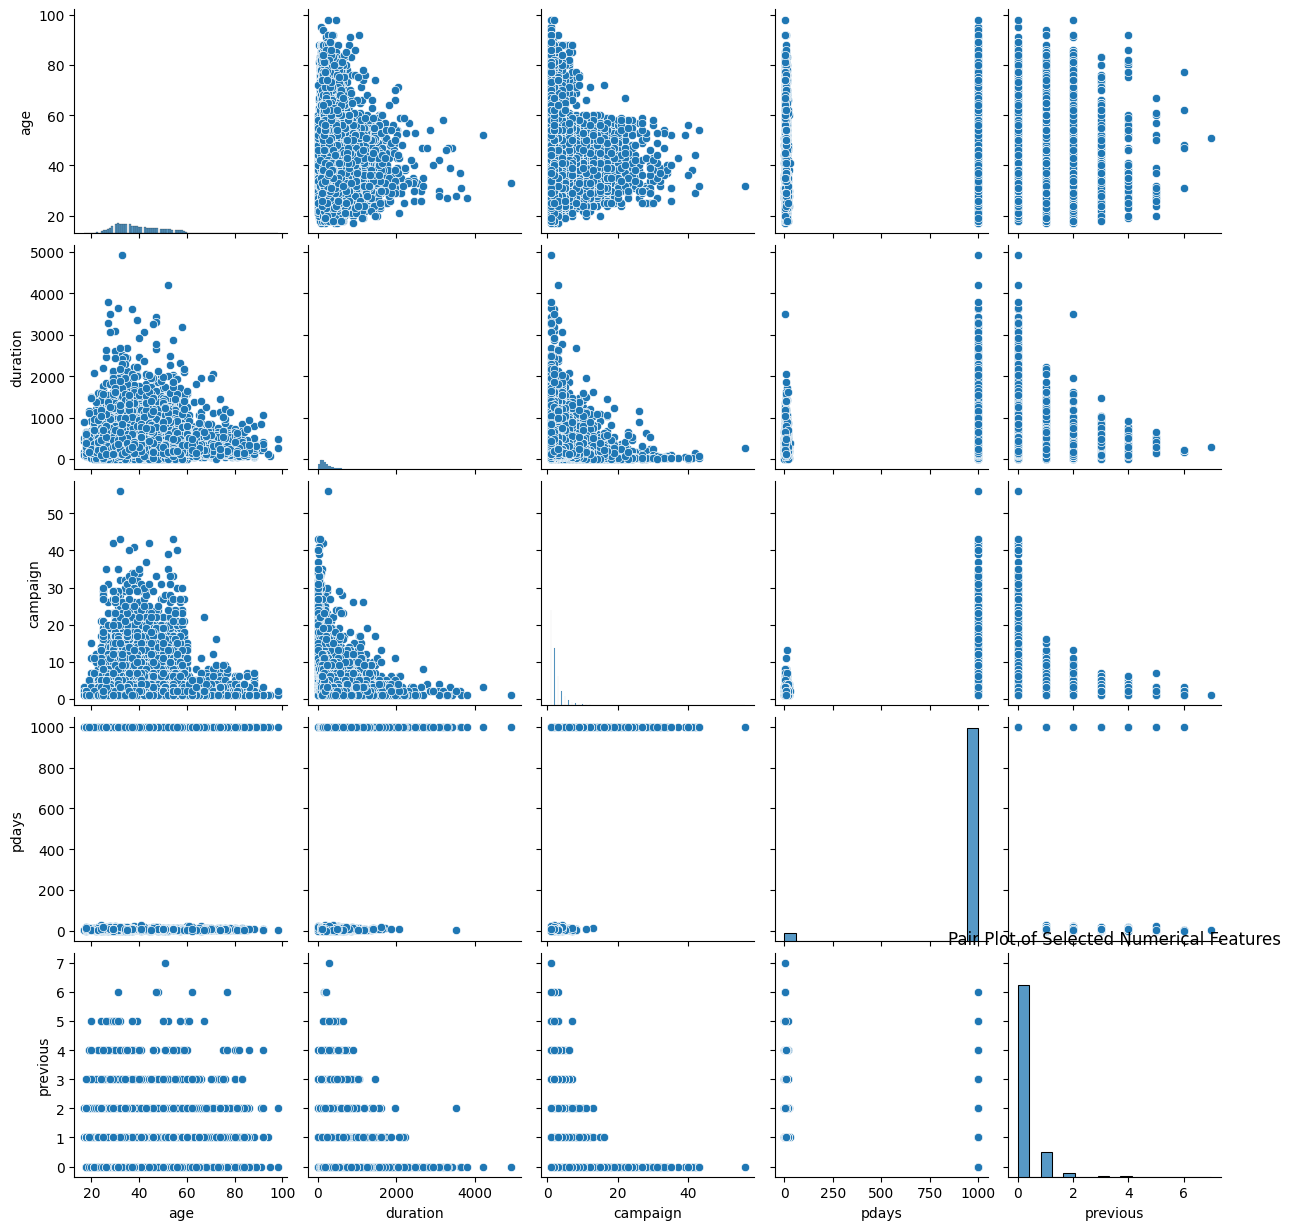

In [14]:
sns.pairplot(df[['age', 'duration', 'campaign', 'pdays', 'previous']])
plt.title('Pair Plot of Selected Numerical Features')
plt.show()

In [15]:
# Feature and target separation
X = df_scal.drop("y_n", axis=1)
y = df_scal["y_n"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Feature selection using chi-squared test
selection_model = SelectKBest(chi2, k=5)
selection_model.fit(X_train, y_train)

# Get boolean mask of selected features
support_mask = selection_model.get_support()

# Get the selected column names from the original DataFrame
selected_columns = X_train.columns[support_mask]

# Transform the train and test sets to retain only selected features
X_train = pd.DataFrame(selection_model.transform(X_train), columns=selected_columns, index=X_train.index)
X_test = pd.DataFrame(selection_model.transform(X_test), columns=selected_columns, index=X_test.index)

# Display the first few rows of selected features in the training set
X_train.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed
12727,0.0,0.0,1.000000,0.980730,1.000000
35799,0.0,0.0,0.333333,0.138291,0.512287
1423,0.0,0.0,0.937500,0.956926,0.859735
52,0.0,0.0,0.937500,0.957379,0.859735
28739,0.0,0.0,0.333333,0.175924,0.512287


In [16]:
X_test.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed
36254,0.0,0.000000,0.104167,0.143278,0.425709
32662,0.5,0.142857,0.333333,0.150759,0.512287
40860,0.0,0.000000,0.479167,0.073679,0.000000
32897,0.5,0.142857,0.333333,0.150759,0.512287
16461,0.0,0.000000,1.000000,0.981410,1.000000


In [17]:
X_train["y_n"] = list(y_train)
X_test["y_n"] = list(y_test)
X_train.to_csv("../Data/bank-data-clean_train.csv", index = False)
X_test.to_csv("../Data/bank-data-clean_test.csv", index = False)

Logistics Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
train_data = pd.read_csv("../Data/bank-data-clean_train.csv")
test_data = pd.read_csv("../Data/bank-data-clean_test.csv")

train_data.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed,y_n
0,0.0,0.0,1.000000,0.980730,1.000000,0.0
1,0.0,0.0,0.333333,0.138291,0.512287,0.0
2,0.0,0.0,0.937500,0.956926,0.859735,0.0
3,0.0,0.0,0.937500,0.957379,0.859735,0.0
4,0.0,0.0,0.333333,0.175924,0.512287,0.0


In [20]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [23]:
accuracy_score(y_test, y_pred)

0.8919378338999514

Optimization

In [34]:
from sklearn.model_selection import GridSearchCV
from pickle import dump
import warnings
import time

In [35]:
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(C=0.1, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [37]:
# Suppress only specific types of warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Adjust category if needed

# Start timing the grid search
start_time = time.time()

# Fit the grid search model
grid.fit(X_train, y_train)

# Calculate the elapsed time
elapsed_time = time.time() - start_time

# Print the best hyperparameters and how long the grid search took
print(f"Best hyperparameters: {grid.best_params_}")
print(f"Grid search completed in {elapsed_time:.2f} seconds")

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Grid search completed in 51.25 seconds


In [38]:
model = LogisticRegression(C = 0.1, penalty = "l2", solver = "liblinear")
model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [39]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
accuracy_score(y_test, y_pred)

0.8938805245264692